# Food Image Classification

----------------------------------------------------------------------
## **Context** 
-------------------------------------------------------------------------------
Image classification has become less complicated with deep learning and the availability of larger datasets and computational assets. The Convolution neural network is the most popular and extensively used image classification technique today.

A given stock photography company is an online source of images available for people and companies to download. Photographers from all over the world upload food-related images to the stock photography agency every day. Since the volume of the images that get uploaded daily will be high, it will be difficult for anyone to label the images manually.

--------------------------------------------------------------------------------
## **Objective**
--------------------------------------------------------------------------------
The objective is to build a classification model using a dataset consisting of images in three categories of food: **Bread, Soup, and Vegetables-Fruits**

-----------------------------------------------------------------------------
## **Dataset**
----------------------------------------------------------------------------
The dataset folder contains different food images. The images are already split into Training and Testing folders.
Each folder has  four subfolders named **`Bread`**, **`Soup`**, and  **`Vegetables-Fruits`**. These folders have images of the respective classes.

## **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# For Data Visualization
import cv2 
import seaborn as sns 

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend 
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
#from google.colab.patches import cv2_imshow

# Needed to silence tensorflow messages while running locally
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

import warnings
warnings.filterwarnings("ignore")


In [2]:
path = 'Food_Data.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Preparing the Data**

The dataset has two folders, i.e., 'Training' and 'Testing'. Each of these folders has three sub-folders, namely 'Bread', 'Soup', and 'Vegetable-Fruit'. We will have the Training and Testing path stored in a variable named 'DATADIR'. The names of the sub-folders, which will be the classes for our classification task will be stored in an array called 'CATEGORIES'. 

### **Training Data**

We will convert each image into arrays and store them in an array called 'training_data' along with their class index.

In [3]:
# Storing the training path in a variable named DATADIR, and storing the unique categories/labels in a list

DATADIR = "Food_Data/Training"                                        # Path of training data after unzipping
CATEGORIES = ["Bread", "Soup", "Vegetable-Fruit"]                              # Storing all the categories in 'CATEGORIES' variable
IMG_SIZE = 150                                                                 # Defining the size of the image to 150    

In [4]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []  

# Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR, category)                                 # Joining images with labels
        class_num = category                                                   
        
        for img in os.listdir(path):                                           
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data
          
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images 
          
            training_data.append([new_array, class_num])                       # Appending both the images and labels

create_training_data()

### **Testing Data**

We will do the same operation with our Testing data. We will convert each images into arrays and then append them to our array named 'testing_data' along with their class indexes.

In [5]:
DATADIR_test = "Food_Data/Testing"                                    # Path of training data after unzipping
CATEGORIES =  ["Bread", "Soup", "Vegetable-Fruit"]                             # Storing all the categories in categories variable
IMG_SIZE = 150                                                                 # Defining the size of the image to 150

In [6]:
# Here we will be using a user defined function create_testing_data() to extract the images from the directory
testing_data = []

# Storing all the testing images
def create_testing_data():                                                     
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR_test, category)                            # Joining images with labels     
        class_num = category
        
        for img in os.listdir(path):                                           
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data
        
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images
          
            testing_data.append([new_array, class_num])                        # Appending both the images and labels

create_testing_data()

## **Visualizing images randomly from each class**

-----------------------------------------------------------------------------------------
### **Bread**
------------------------------------------------------------------------------------

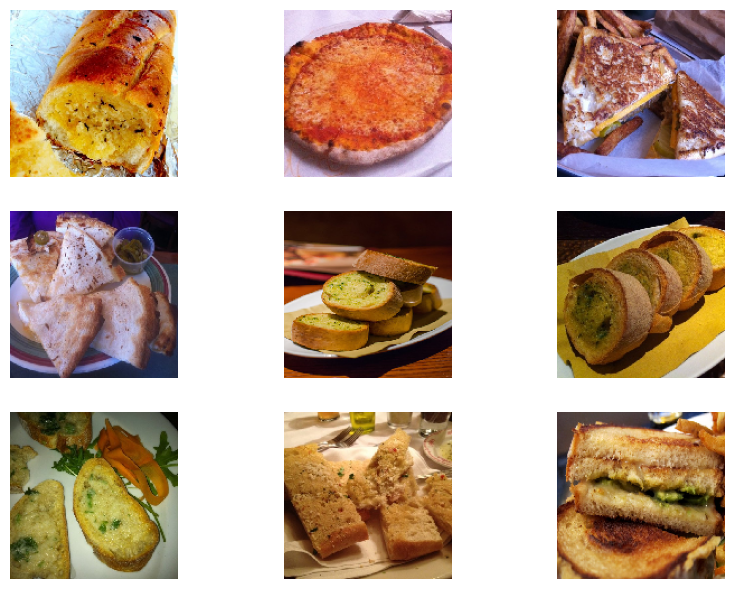

In [7]:
bread_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]
select_bread = np.random.choice(bread_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
  
    fp = f'{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}'
  
    fn = load_img(fp, target_size = (150, 150))
  
    plt.imshow(fn, cmap = 'Greys_r')
  
    plt.axis('off')

plt.show()  

**Observations:**

* Most bread items have a round, oval or elliptical shape, except for sandwiches.

* Almost all bread items have a grilled or charred portion, which can be an easily recognizable feature to our Neural Network.

------------------------------------------------------------------------------------------------
### **Soup**
-------------------------------------------------------------------------------------

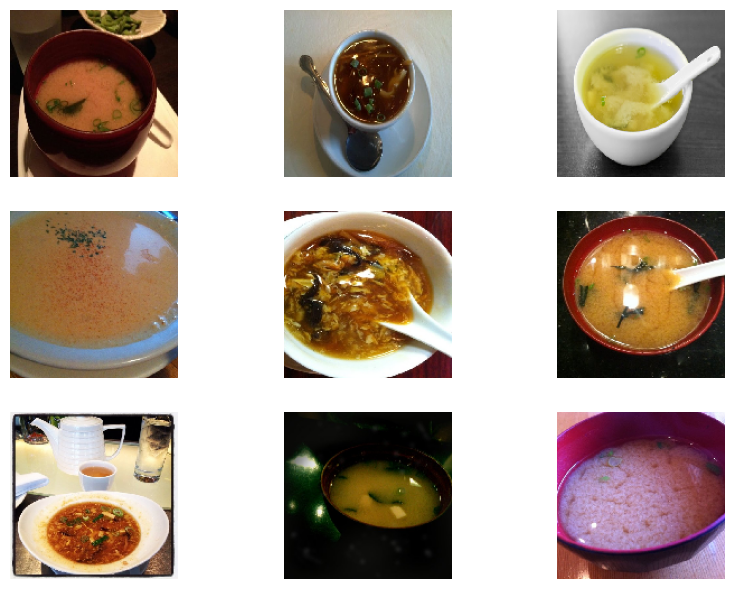

In [8]:
soup_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}') ]
select_soup = np.random.choice(soup_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
  
    fp = f'{DATADIR}/{CATEGORIES[1]}/{select_soup[i]}'
  
    fn = load_img(fp, target_size = (150, 150))
  
    plt.imshow(fn, cmap = 'Greys_r')
  
    plt.axis('off')

plt.show()  

**Observations:**

* All Soup images are defined by a liquid taking on the shape of the container or utensil it is kept in.

* There is a distinct glare from the reflection of light on most of the images.

* Also, almost all of these images have a utensil, which can be a feature that confuses the model between bread and soup. As, images from both the classes mostly contain a dish or a bowl, where they are placed.

-------------------------------------------------------------------------------------------------------
### **Vegetable-Fruit**
--------------------------------------------------------------------------------------

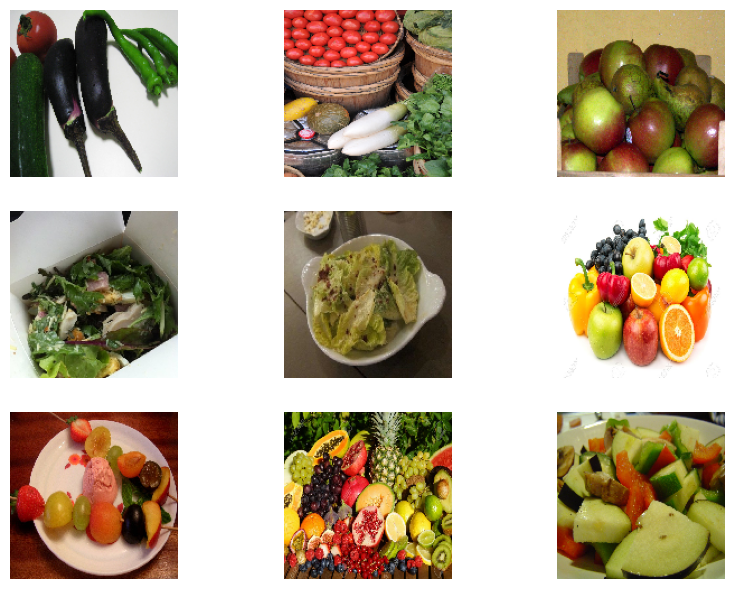

In [9]:
vegetable_fruit_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]
select_vegetable_fruit = np.random.choice(vegetable_fruit_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
  
    fp = f'{DATADIR}/{CATEGORIES[2]}/{select_vegetable_fruit[i]}'
  
    fn = load_img(fp, target_size = (150, 150))
  
    plt.imshow(fn, cmap = 'Greys_r')
  
    plt.axis('off')

plt.show()  

**Observation:**

* Most of the images in these classes have vibrant colors and a repeating shape throughout the image. 



### **Data Preprocessing** 

The arrays training_data and testing_data had the images stored as arrays with their corresponding labels as the class indexes. So in essence, our training_data and testing_data were arrays of tuples, where each tuple contained the image and its label.

In the following cells, we will unpack the tuples. We will shuffle our training_data and testing_data, and store the images in X_train, and X_test, and the labels in y_train, and y_test respectively.

In [10]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []                                                                   
y_train = []

np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_data:                                          # Iterating over the training data which is generated from the create_training_data() function 
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)                                                      # Appending labels into y_train

In [11]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in testing_data:                                           # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_test
    y_test.append(label)                                                       # Appending labels into y_test

In [12]:
# Converting the pixel values into Numpy array
X_train = np.array(X_train) 
X_test = np.array(X_test) 
X_train.shape

(3203, 150, 150, 3)

**Note:** Images are digitally represented in the form of NumPy arrays which can be observed from the X_train values generated above, so it is possible to perform all the preprocessing operations and build our CNN model using NumPy arrays directly. So, even if the data is provided in the form of NumPy arrays rather than images, we can use this to work on our model. 

In [13]:
# Converting the lists into DataFrames
y_train = pd.DataFrame(y_train, columns = ["Label"], dtype = object) 
y_test = pd.DataFrame(y_test, columns = ["Label"], dtype = object)

Since the given data is stored in variables X_train, X_test, y_train, and y_test, there is no need to split the data further. 

## **Checking Distribution of Classes**

In [14]:
# Printing the value counts of target variable
count = y_train.Label.value_counts()
print(count)

print('*'*10)

count = y_train.Label.value_counts(normalize = True)
print(count)

Soup               1500
Bread               994
Vegetable-Fruit     709
Name: Label, dtype: int64
**********
Soup               0.468311
Bread              0.310334
Vegetable-Fruit    0.221355
Name: Label, dtype: float64


## **Normalizing the data**

In neural networks, it is always suggested to **normalize the feature inputs**. Normalization has the below benefits while training the model of a neural network: 

1. **Normalization makes the training faster and reduces the chances of getting stuck at local optima.**
2. In deep neural networks, **normalization helps to avoid exploding gradient problems.** Gradient exploding problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

As we know image pixel **values range from 0-255**, here we are simply **dividing all the pixel values by 255 to standardize all the images to have values between 0-1.**

In [15]:
# Normalizing the image data 
X_train = X_train/255.0

X_test = X_test/255.0

## **Encoding Target Variable**

For any ML or DL techniques, the labels must be encoded into numbers or arrays, so that we can compute the cost between the predicted and the real labels.

In this case, we have 3 classes "Bread", "Soup", and "Vegetable-Fruit". We want the corresponding labels to look like:
* [1, 0, 0] --------- Bread
* [0, 1, 0] --------- Soup
* [0, 0, 1] --------- Vegetable-Fruit


Each class will be represented in the form of an array.

In [16]:
y_train_encoded = [ ]

for label_name in y_train["Label"]:
    if(label_name == 'Bread'):
        y_train_encoded.append(0)

    if(label_name == 'Soup'):
        y_train_encoded.append(1)

    if(label_name == 'Vegetable-Fruit'):
        y_train_encoded.append(2)

y_train_encoded = to_categorical(y_train_encoded, 3)
y_train_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [17]:
y_test_encoded = [ ]

for label_name in y_test["Label"]:
    if(label_name == 'Bread'):
        y_test_encoded.append(0)

    if(label_name == 'Soup'):
        y_test_encoded.append(1)

    if(label_name == 'Vegetable-Fruit'):
        y_test_encoded.append(2)

y_test_encoded = to_categorical(y_test_encoded, 3)
y_test_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## **Model Building** 

Now that we have done data preprocessing, let's build the first Convolutional Neural Network (CNN) model.

### **Model 1 Architecture:**

* The first CNN Model will have three convolutional blocks.
* Each convolutional block will have a Conv2D layer and a MaxPooling2D Layer.
* Add first Conv2D layer with **64 filters** and a **kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (150, 150, 3)**. Use **'relu' activation**.
* Add MaxPooling2D layer with **kernel size 2x2** and use **padding = 'same'**.
* Add a second Conv2D layer with **32 filters** and **a kernel size of 3x3**. Use the **'same' padding** and **'relu activation**.
* Follow it up with another MaxPooling2D layer **kernel size 2x2** and use **padding = 'same'**.
* Add a third Conv2D layer with **32 filters and the kernel size of 3x3**. Use the **'same' padding** and **'relu activation**. Once again, follow it up with another Maxpooling2D layer with **kernel size 2x2** and **padding = 'same'**.
* Once the convolutional blocks are added, add the Flatten layer.
* Finally, add dense layers. 
* Add first Dense layer with **100 neurons** and **'relu' activation**
* The last dense layer must have as many neurons as the number of classes, which in this case is 3 and use **'softmax' activation**.
* Initialize SGD optimizer with **learning rate = 0.01** and **momentum = 0.9**
* Compile your model using the optimizer you initialized and use **categorical_crossentropy** as the loss function and 'accuracy' as the metric
* Print the model summary and write down your observations/insights about the model.

**Note:** We need to clear the previous model's history from the Keras backend. Also, we must fix the seed for random number generators after clearing the backend to make sure we receive the same output every time we run the code.

In [18]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [19]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = "same", input_shape = (150, 150, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Add third conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation = 'relu'))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(3, activation = 'softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)

# Compiling the model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating the summary of the model
model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxP

**Observations:**

- As we can see from the above summary, this CNN model will train and learn **1,185,107 parameters (weights and biases).**
- There are **no non-trainable parameters** in the model.
- The model is fairly large and we might expect overfitting.

### **Training the Model**

Let's now train the model using the training data.

In [20]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Fitting the model with 30 epochs and validation_split as 10%
history=model.fit(X_train, 
          y_train_encoded,  
          epochs = 60, 
          batch_size= 32, validation_split = 0.10, callbacks = [es, mc])  

Epoch 1/60
91/91 [==============================] - ETA: 0s - loss: 1.0430 - accuracy: 0.4632
Epoch 1: val_accuracy improved from -inf to 0.45171, saving model to best_model.h5
91/91 [==============================] - 5s 53ms/step - loss: 1.0430 - accuracy: 0.4632 - val_loss: 1.0074 - val_accuracy: 0.4517
Epoch 2/60
91/91 [==============================] - ETA: 0s - loss: 0.9860 - accuracy: 0.5056
Epoch 2: val_accuracy did not improve from 0.45171
91/91 [==============================] - 4s 43ms/step - loss: 0.9860 - accuracy: 0.5056 - val_loss: 0.9878 - val_accuracy: 0.4361
Epoch 3/60
90/91 [============================>.] - ETA: 0s - loss: 0.8551 - accuracy: 0.5767
Epoch 3: val_accuracy improved from 0.45171 to 0.56698, saving model to best_model.h5
91/91 [==============================] - 4s 44ms/step - loss: 0.8547 - accuracy: 0.5770 - val_loss: 0.8144 - val_accuracy: 0.5670
Epoch 4/60
91/91 [==============================] - ETA: 0s - loss: 0.7443 - accuracy: 0.6312
Epoch 4: val_a

### **Plotting the Training and Validation Accuracies**

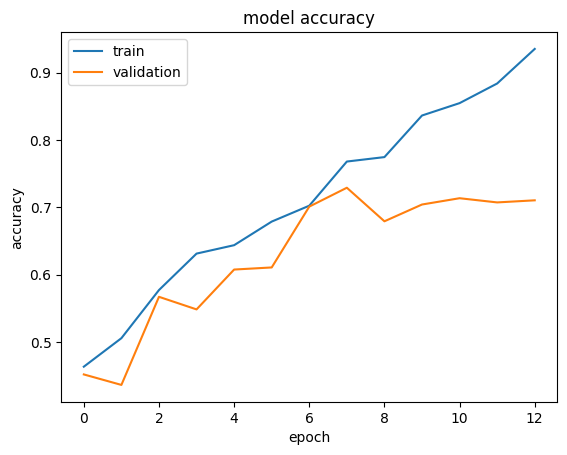

In [21]:
# Plotting the training and validation accuracies for each epoch 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### **Checking Test Accuracy**

In [22]:
model.evaluate(X_test, (y_test_encoded))

35/35 [==============================] - 1s 20ms/step - loss: 0.7750 - accuracy: 0.7477


[0.7749833464622498, 0.7477148175239563]

**Observations:**

* The training didn't continue for all of the 60 epochs. The training stopped because the performance wasn't improving beyond a certain point.
* From the above plot, we observe that the training accuracy is continuously improving. However, it was not the case with the validation accuracy. The validation accuracy leveled off after 6 epochs.
* All the above observations suggest that the model was overfitting on the training data.
* However, the model was reasonably consistent on validation and test data.

### **Plotting Confusion Matrix**

35/35 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

           0       0.76      0.53      0.62       362
           1       0.76      0.85      0.80       500
           2       0.72      0.87      0.79       232

    accuracy                           0.75      1094
   macro avg       0.74      0.75      0.74      1094
weighted avg       0.75      0.75      0.74      1094



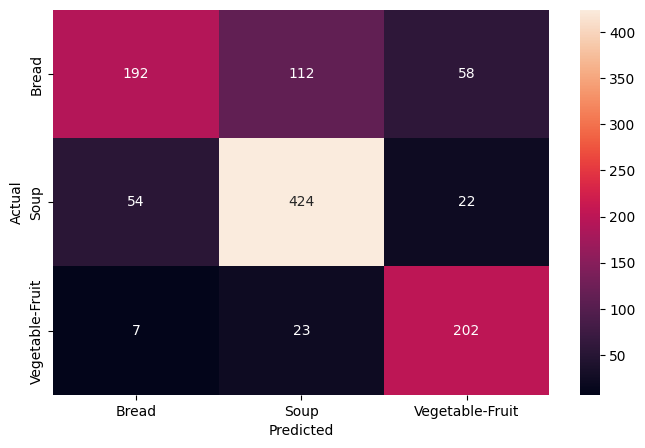

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**

* The model is giving about 75% accuracy on the test data
* There have been many misclassifications between all classes.
* A large number of images of 'Bread' were predicted to be 'Soup'. We had earlier predicted this because both these classes show the presence of a dish or a utensil in the images.
* There have been misclassifications between 'Bread' and 'Vegetable-Fruit' as well. We can attribute this to the presence of yellowish pixels in both. Hence, the model might have taken one for the other.
* The misclassifications between 'Vegetable-Fruit' and 'Soup' have been the least, as we can see that there is minimal visual overlap among these classes.

Let's try to build another model with a different architecture and see if we can improve the model performance. Since the first model was overfitting, we will add Dropout layers at the end of each convolutional block.

### **Model 2 Architecture:**

* We plan on having 4 convolutional blocks in this Architecture, each having a Conv2D, MaxPooling2D, and a Dropout layer.
* Add first Conv2D layer with **256 filters** and a **kernel size of 5x5**. Use the **'same' padding** and provide the **input shape = (150, 150, 3)**. Use **'relu' activation**.
* Add MaxPooling2D layer with **kernel size 2x2** and **stride size 2x2**.
* Add a Dropout layer with a dropout ratio of **0.25**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 5x5**. Use the **'same' padding** and **'relu' activation**.
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.25 dropout ratio.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 3x3**. Use the **'same' padding** and **'relu' activation**. 
* Follow this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.25.
* Add a fourth Conv2D layer with **32 filters** and a **kernel size of 3x3**. Use the **'same' padding** and **'relu' activation**. 
* Follow this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.25.
* Once the convolutional blocks are added, add the Flatten layer.
* Add first fully connected dense layer with 64 neurons and use **'relu' activation**.
* Add a second fully connected dense layer with 32 neurons and use **'relu' activation**.
* Add your final dense layer with 3 neurons and use **'softmax' activation function**.
* Initialize an **Adam optimizer** with a learning rate of 0.001.
* Compile your model with the optimizer you initialized and use **categorical_crossentropy** as the loss function and the 'accuracy' as the metric.
* Print your model summary and write down your observations.

In [24]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [25]:
# Initializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 256 filters and kernel size 5x5, with ReLU activation and padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model_2.add(Conv2D(filters = 256, kernel_size = (5, 5), padding = 'Same', activation = 'relu', input_shape = (150, 150, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Adding second conv layer with 128 filters and with kernel size 5x5 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (5, 5), padding = 'Same', activation = 'relu'))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Adding third conv layer with 64 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Adding fourth conv layer with 32 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding first fully connected dense layer with 64 neurons 
model_2.add(Dense(64, activation = "relu"))

# Adding second fully connected dense layer with 32 neurons 
model_2.add(Dense(32, activation = "relu"))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(3, activation = "softmax"))

# Using Adam Optimizer
optimizer = Adam(lr = 0.001)

# Compile the model
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics = ["accuracy"])

In [26]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       819328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 128)       0

**Observations:**

* We can observe from the above summary that this CNN model will train and learn 1,099,171 parameters (weights and biases).** However, since we have Dropout layers, as the training progresses, few of the neurons will be dropped and thus effective trainable parameters will also be less.
* This model has more convolutional blocks and hence, we can expect this model to perform better in extracting features from the images.
* We are using a different optimizer. i.e., Adam. Let's see if we receive any improvement in performance.

### **Training the Model**

Let's now train the model using the training data.

In [27]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

history=model_2.fit(X_train, 
          y_train_encoded,  
          epochs = 60, 
          batch_size = 32, validation_split = 0.10, use_multiprocessing = True)

Epoch 1/60
91/91 [==============================] - 55s 580ms/step - loss: 1.0712 - accuracy: 0.4660 - val_loss: 1.0612 - val_accuracy: 0.4361
Epoch 2/60
91/91 [==============================] - 52s 569ms/step - loss: 1.0645 - accuracy: 0.4715 - val_loss: 1.0696 - val_accuracy: 0.4361
Epoch 3/60
91/91 [==============================] - 52s 572ms/step - loss: 1.0514 - accuracy: 0.4688 - val_loss: 1.0583 - val_accuracy: 0.4361
Epoch 4/60
91/91 [==============================] - 52s 570ms/step - loss: 1.0549 - accuracy: 0.4695 - val_loss: 1.0615 - val_accuracy: 0.4361
Epoch 5/60
91/91 [==============================] - 52s 571ms/step - loss: 1.0202 - accuracy: 0.5049 - val_loss: 0.9344 - val_accuracy: 0.5483
Epoch 6/60
91/91 [==============================] - 54s 592ms/step - loss: 0.9186 - accuracy: 0.5566 - val_loss: 0.9013 - val_accuracy: 0.5421
Epoch 7/60
91/91 [==============================] - 52s 573ms/step - loss: 0.8184 - accuracy: 0.5999 - val_loss: 0.7939 - val_accuracy: 0.5794

Epoch 58/60
91/91 [==============================] - 41s 456ms/step - loss: 0.0669 - accuracy: 0.9757 - val_loss: 1.5505 - val_accuracy: 0.7040
Epoch 59/60
91/91 [==============================] - 41s 456ms/step - loss: 0.0710 - accuracy: 0.9743 - val_loss: 1.3778 - val_accuracy: 0.7383
Epoch 60/60
91/91 [==============================] - 41s 456ms/step - loss: 0.0560 - accuracy: 0.9774 - val_loss: 1.5371 - val_accuracy: 0.7290


### **Plotting the Training and Validation Accuracies**

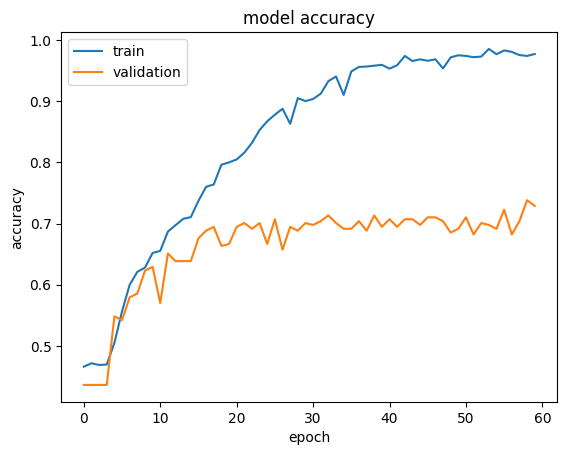

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

### **Checking Test Accuracy**

In [29]:
model_2.evaluate(X_test, y_test_encoded)

35/35 [==============================] - 5s 138ms/step - loss: 1.3612 - accuracy: 0.7678


[1.361244797706604, 0.7678245306015015]

**Observations:**

* By comparing the train and validation accuracy, it seems the model is not overfitting as much. So adding Dropout layers definitely proved beneficial.
* The training also ran for more epochs. So training accuracy never stayed stagnant. It showed improvement throughout.
* The validation accuracy stopped showing any significant improvements after about 20 epochs, however, the test accuracy did improve slightly.

### **Plotting Confusion Matrix**

35/35 [==============================] - 5s 136ms/step
              precision    recall  f1-score   support

           0       0.74      0.56      0.64       362
           1       0.75      0.87      0.81       500
           2       0.84      0.88      0.85       232

    accuracy                           0.77      1094
   macro avg       0.78      0.77      0.77      1094
weighted avg       0.77      0.77      0.76      1094



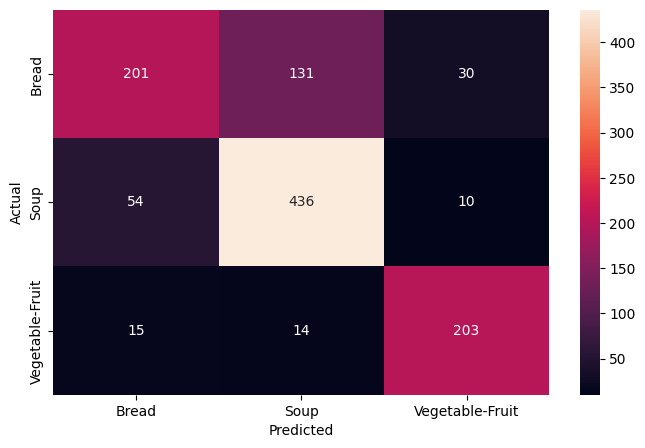

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_2.predict(X_test)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(y_test_encoded, axis = 1)

#Printing the classification report
print(classification_report(y_true, pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**

* Bread formerly mistaken for vegetable-fruit has be re-misclassified as soup in many cases.
* Bread and Soup continue to be the most misclassified classes.
* We can still try to add more layers to see if we can bring down the misclassification further.

### **Prediction**

Let us predict using the best model, i.e., model 2, by plotting one random image from X_test data and see if our best model is predicting the image correctly or not.

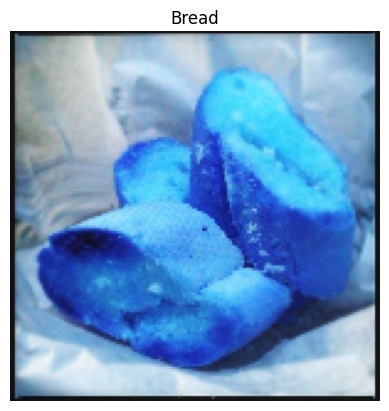

In [80]:
import cv2 

# Plotting the test image 
image = (X_test[2]) 
i = y_test.Label[1]
i = np.argmax(i)
if(i == 0):
    plt.title("Bread")
if(i == 1):
    plt.title("Soup")
if(i == 2):
    plt.title("Vegetable-Fruit")

plt.axis('off')
plt.imshow(image)

In [81]:
# Predicting the test image with the best model and storing the prediction value in res variable
res = model_2.predict(X_test[2].reshape(1, 150, 150, 3))

1/1 [==============================] - 0s 15ms/step


In [82]:
# Applying argmax on the prediction to get the highest index value
i=np.argmax(res)
if(i == 0):
    print("Bread")
if(i==1):
    print("Soup")
if(i==2):
    print("Vegetable-Fruit")

Bread


**Observation:**

- The model is able to correct classify the image we have randomly chosen from the test data.

## **Conclusion**

1. As we have seen, the second CNN model was able to predict the test image correctly with a test accuracy of close to 77%.

2. **There is still scope for improvement in the test accuracy of the CNN model** chosen here. **Different architectures** and **optimizers** can be used to build a better food classifier. 

3. Transfer learning can be applied to the dataset to improve accuracy. There are multiple options to choose from within the Keras framework. 

4. Once the desired performance is achieved from the model, the company can use it to classify different images being uploaded to the website.

5. We can further try to improve the performance of the CNN model by using some of the below techniques and see if you can increase accuracy: 
    - We can try hyperparameter tuning for some of the hyperparameters like the number of convolutional blocks, the number of filters in each Conv2D layer, filter size, activation function, adding/removing dropout layers, changing the dropout ratio, etc.
    - Data Augmentation might help to make the model more robust and invariant toward different orientations.
